# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ahmed Fathir Syafaat
- **Email:** fathir123t@gmail.com
- **ID Dicoding:** fathir

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah sepeda yang disewa?
- Bagaimana pengaruh waktu dalam sehari terhadap jumlah sepeda yang disewa?

## Import Semua Packages/Library yang Digunakan

In [3]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [5]:
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")

## Data Wrangling

### Gathering Data

In [8]:
# Memuat data
day_data = pd.read_csv('data/day.csv')
hour_data = pd.read_csv('data/hour.csv')

# Menampilkan dataset harian
print(day_data.head())

# Menampilkan dataset jam
print(hour_data.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

### Assessing Data

In [9]:
# Informasi dataset harian
print(day_data.info())

# Informasi dataset jam
print(hour_data.info())

# Statistik deskriptif dataset harian
print(day_data.describe())

# Statistik deskriptif dataset jam
print(hour_data.describe())

# Mengecek nilai yang hilang di dataset harian
print(day_data.isnull().sum())

# Mengecek nilai yang hilang di dataset jam
print(hour_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

### Cleaning Data

In [10]:
# Mengubah tipe data kolom yang diperlukan di dataset harian
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
day_data['season'] = day_data['season'].astype('category')
day_data['yr'] = day_data['yr'].astype('category')
day_data['mnth'] = day_data['mnth'].astype('category')
day_data['holiday'] = day_data['holiday'].astype('category')
day_data['weekday'] = day_data['weekday'].astype('category')
day_data['workingday'] = day_data['workingday'].astype('category')
day_data['weathersit'] = day_data['weathersit'].astype('category')

# Mengubah tipe data kolom yang diperlukan di dataset jam
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
hour_data['season'] = hour_data['season'].astype('category')
hour_data['yr'] = hour_data['yr'].astype('category')
hour_data['mnth'] = hour_data['mnth'].astype('category')
hour_data['hr'] = hour_data['hr'].astype('category')
hour_data['holiday'] = hour_data['holiday'].astype('category')
hour_data['weekday'] = hour_data['weekday'].astype('category')
hour_data['workingday'] = hour_data['workingday'].astype('category')
hour_data['weathersit'] = hour_data['weathersit'].astype('category')


## Exploratory Data Analysis (EDA)

### Explore Dataset Harian

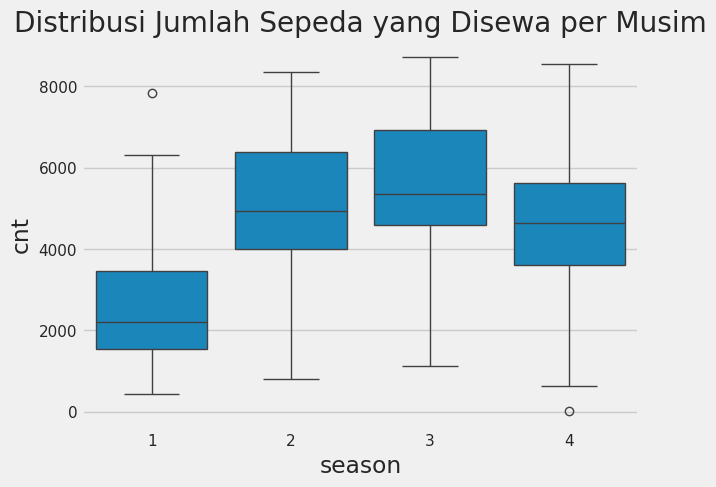

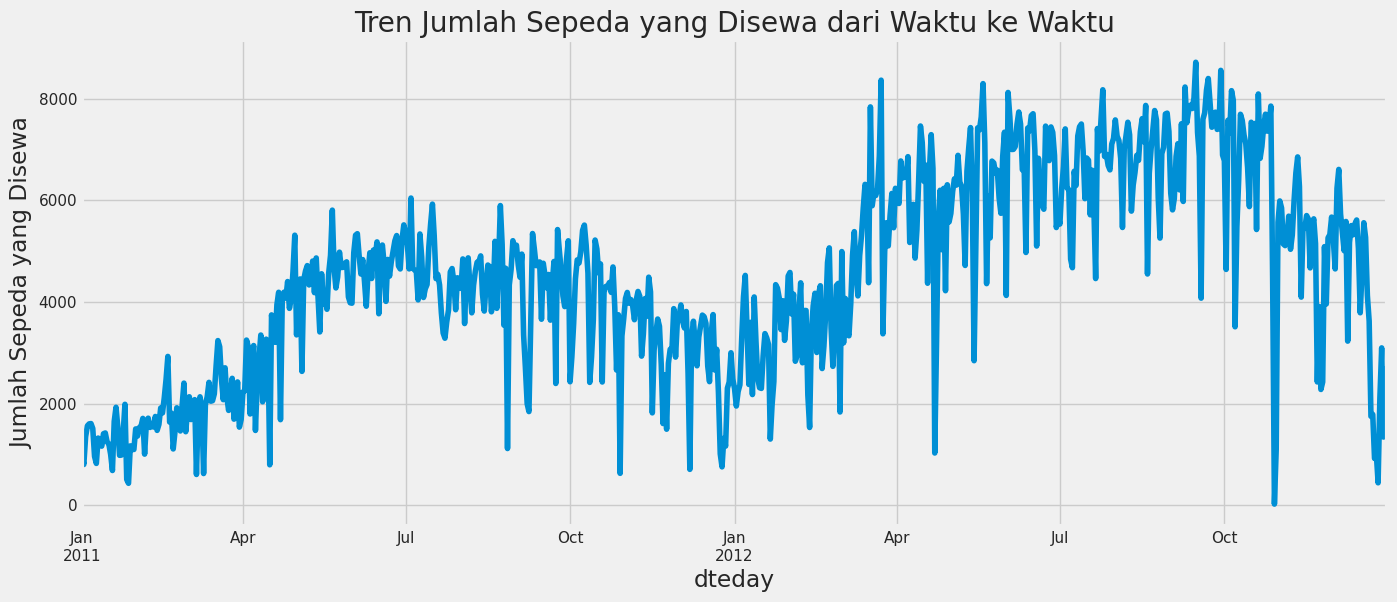

In [11]:
# Distribusi jumlah sepeda yang disewa per musim
sns.boxplot(x='season', y='cnt', data=day_data)
plt.title('Distribusi Jumlah Sepeda yang Disewa per Musim')
plt.show()

# Tren jumlah sepeda yang disewa dari waktu ke waktu
day_data.set_index('dteday')['cnt'].plot(figsize=(15, 6))
plt.title('Tren Jumlah Sepeda yang Disewa dari Waktu ke Waktu')
plt.ylabel('Jumlah Sepeda yang Disewa')
plt.show()


### Explore Dataset Jam

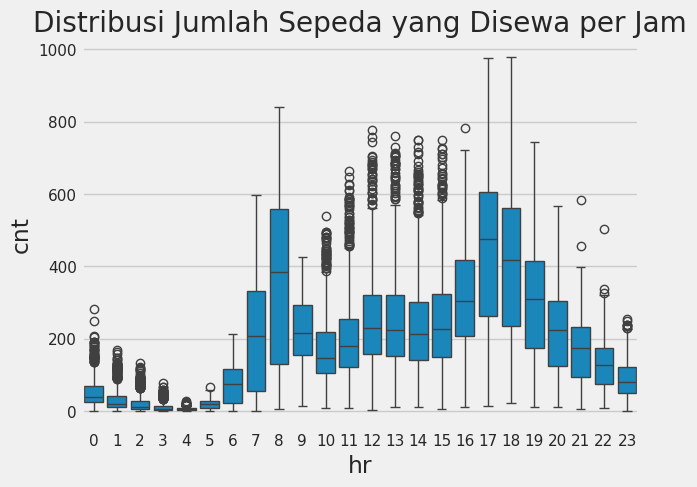

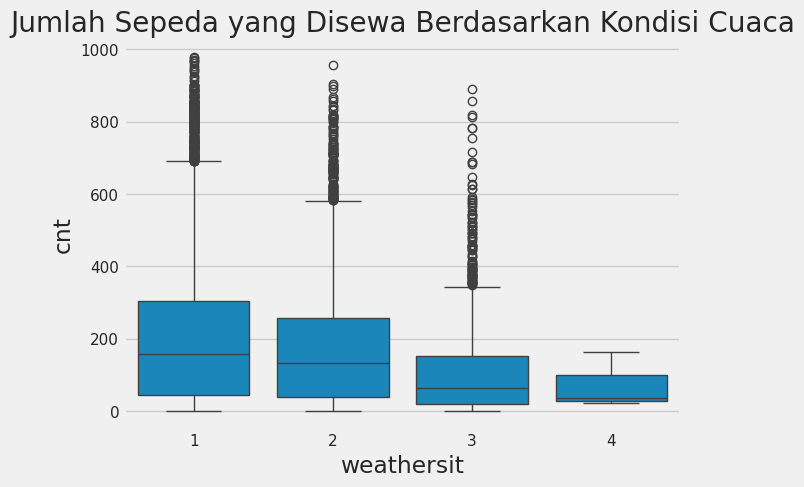

In [12]:
# Distribusi jumlah sepeda yang disewa per jam
sns.boxplot(x='hr', y='cnt', data=hour_data)
plt.title('Distribusi Jumlah Sepeda yang Disewa per Jam')
plt.show()

# Jumlah sepeda yang disewa berdasarkan kondisi cuaca
sns.boxplot(x='weathersit', y='cnt', data=hour_data)
plt.title('Jumlah Sepeda yang Disewa Berdasarkan Kondisi Cuaca')
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-13-cd5b698da468>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_cnt = day_data.groupby('season')['cnt'].sum().reset_index()


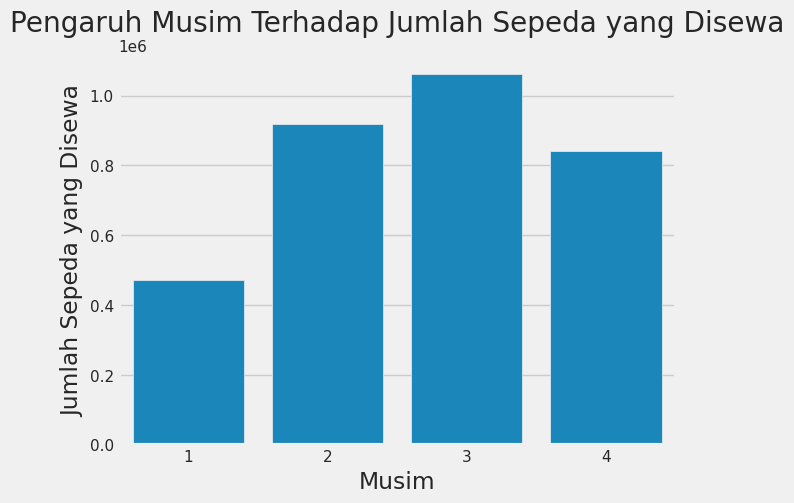

In [13]:
# Pengaruh musim terhadap jumlah sepeda yang disewa
season_cnt = day_data.groupby('season')['cnt'].sum().reset_index()
sns.barplot(x='season', y='cnt', data=season_cnt)
plt.title('Pengaruh Musim Terhadap Jumlah Sepeda yang Disewa')
plt.xlabel('Musim')
plt.ylabel('Jumlah Sepeda yang Disewa')
plt.show()


### Pertanyaan 2:

<ipython-input-14-9aa6ec618456>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_cnt = hour_data.groupby('hr')['cnt'].mean().reset_index()


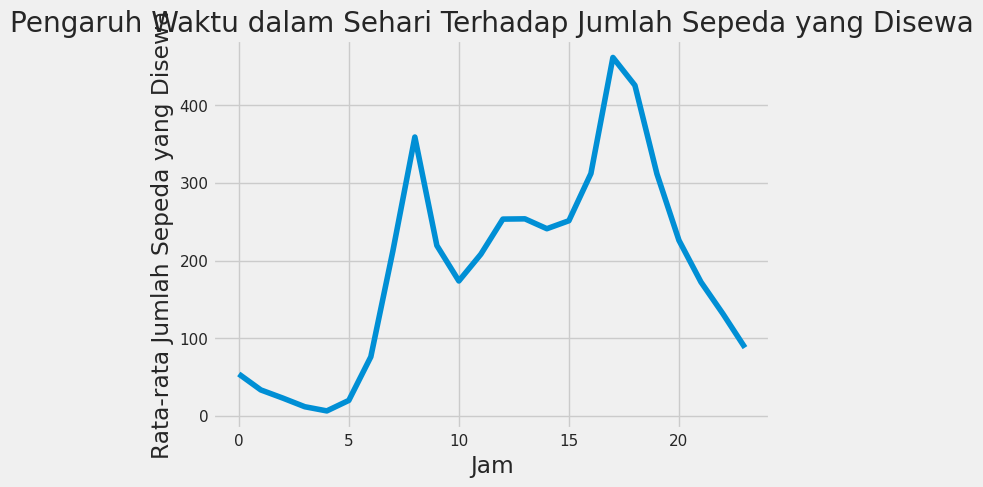

In [14]:
# Pengaruh waktu dalam sehari terhadap jumlah sepeda yang disewa
hour_cnt = hour_data.groupby('hr')['cnt'].mean().reset_index()
sns.lineplot(x='hr', y='cnt', data=hour_cnt)
plt.title('Pengaruh Waktu dalam Sehari Terhadap Jumlah Sepeda yang Disewa')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Sepeda yang Disewa')
plt.show()


## Conclusion

- Jumlah sepeda yang disewa bervariasi berdasarkan musim. Dari grafik, kita dapat melihat bahwa musim dengan jumlah penyewaan sepeda terbanyak adalah musim panas, diikuti oleh musim gugur, musim semi, dan musim dingin.
- Jumlah sepeda yang disewa juga bervariasi berdasarkan waktu dalam sehari. Rata-rata jumlah penyewaan sepeda tertinggi terjadi pada pagi hari (sekitar jam 8) dan sore hari (sekitar jam 17-18), yang kemungkinan besar berkaitan dengan jam sibuk orang pergi dan pulang kerja.